In [89]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
from scipy.stats import lognorm
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,10)

### A Little Statistics

### Problem 1: A normal, or Gaussian, distribution is characterized by a bell curve, where the mean, median, and mode are all the same value in the middle of the distribution and the rest of the distribtion is symmetric around this value. For a standard normal distribution the mean is at 0 and the variance and standard deviatiaon is equal to 1. The corresponding sigma values give us information about how far away a value is from the mean of the distribution. 
Integrating the normal distribution using will provide us with the probability up to the standard deviation that we choose, the integral of the distribtion is called the error function. Positive sigma values will give us a probability up to the sigma on the right of the mean. Therefore negative sigma values will provide the probability up to the sigma value to the left of the mean. Here are a few probability calculations with sigma values 1, 2, and 5 respectively. 

1. Probability of sigma = 1, this will give us the percentage probability under the normal distribution if we integrated from negative infinity up to 1 sigma to the right of the mean. Since the distribution is symmetric and centered on 0 sigma, one sigma to the right should correspond to about 84.1%. 

In [2]:
prob_1 = stats.norm.cdf(1, loc = 0, scale = 1)
print('Probability of sigma = 1: ', prob_1)

Probability of sigma = 1:  0.8413447460685429


2. Probability of sigma = 2, this should correspond to about 97%, 2 sigma to the right of the mean in a gaussian curve is almost the entire distribution, excluding some of the rightmost tail. 

In [3]:
prob_2 = stats.norm.cdf(2, loc = 0, scale = 1)
print('Probability of sigma = 2: ', prob_2)

Probability of sigma = 2:  0.9772498680518208


2. a. This is another method to get the same answer as above, for 2 sigma. Since the normal distribution is symmetric we can integrate up to -2 sigma, which would be 2 sigma to the left of the mean, a much smaller probability. If we calculate this percentage, we must subtract it from 1 in order to get the same answer for 2 sigma. 

In [4]:
prob_neg2 = stats.norm.cdf(-2, loc = 0, scale = 1)
print('Probability of sigma = 2: ', prob_2)

Probability of sigma = 2:  0.9772498680518208


3. Probability of sigma = 5, up to 5 sigma is going to be very close to 100% because it contains almost the entire area under the normal distribution.

In [5]:
prob_5 = stats.norm.cdf(5, loc = 0, scale = 1)
print('Probability of sigma = 5: ', prob_5)

Probability of sigma = 5:  0.9999997133484281


4. What if we only want the probability of 2 sigma or higher? There are 2 ways to approach this: We could do the integral up to -2 sigma, or we could subtract the integral up to 2 sigma from 1.

In [6]:
print('Probability of sigma = -2: ', prob_neg2)

Probability of sigma = -2:  0.022750131948179195


In [7]:
print('Probability of sigma = -2: ', 1 - prob_2)

Probability of sigma = -2:  0.02275013194817921


### Now we can go the opposite way. With this function we can input a percentage probability and find the sigma value that this corresponds to. Again, this will provide the answer as if we were integrating up to the value from negative infinity, not from the mean. 

1. Sigma of probability = .93319, this should provide a sigma value between 1 and 2 because 1 sigma is ~84% and 2 sigma is ~97%. I chose this probability from the z table to correspond to ~1.5 sigma.

In [8]:
print('Sigma of P =.93319: ', stats.norm.ppf(.93319))

Sigma of P =.93319:  1.4999783914627915


2. Sigma of probability = .99865, according to z table this should correspond to 3 sigma.

In [9]:
print('Sigma of P =.99865: ', stats.norm.ppf(.99865))

Sigma of P =.99865:  2.9999769927034015


3. Sigma of probability = .5, according to z table this should correspond to 0 sigma, meaning it is the mean.

In [10]:
print('Sigma of P =.5: ', stats.norm.ppf(.5))

Sigma of P =.5:  0.0


4. Sigma of probability = .15866, according to z table this should correspond to -1.

In [11]:
print('Sigma of P =.15866: ', stats.norm.ppf(.15866))

Sigma of P =.15866:  -0.9999803859660787


The negative sigma value means that the percent probability of 15.866% corresponds to a sigma that is 1 sigma to the left of the mean.

## Problem 2: Lognormal Distribution
A distribution is lognormal if F(x) = ln(x) is normally distributed. For this distribution mu and sigma must both be greater than 0. Below are a couple plots to show how the distribution changes with different values of mu and sigma. 

In [12]:
mu, sigma = 1., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100000)

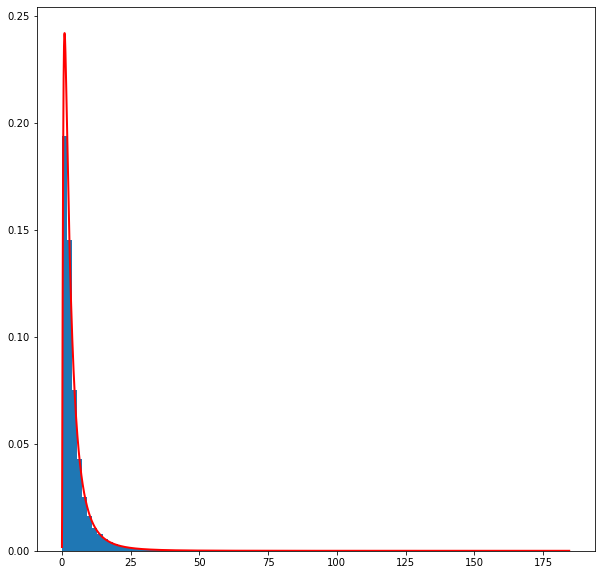

In [13]:
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

How does the shape of the probability distribution change when we adjust sigma?

In [14]:
mu, sigma = 1., .5 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100000)

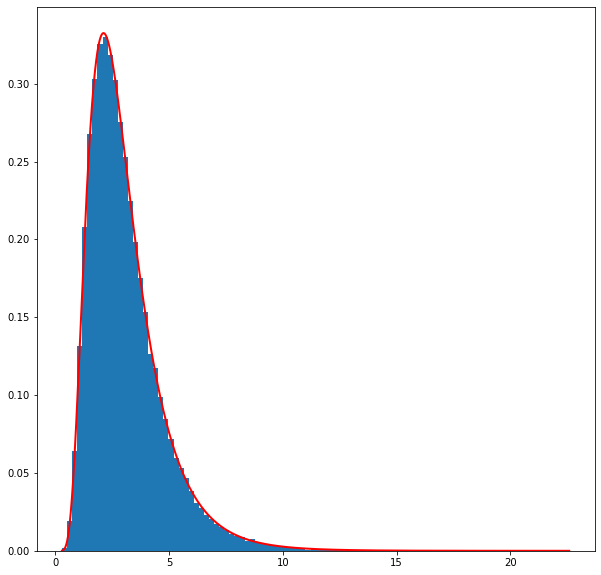

In [15]:
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

When we decrease sigma the distribution becomes wider and moves to the right.

## Problem 3

Using the second lognormal plot and a hypothetical value of 5, I will determine the corresponding value of sigma for my hypothetical measurement. 

In [16]:
val = 5
sigma = .5
mu = 1

frozen_lognorm = stats.lognorm(s = sigma, scale = math.exp(mu))

What is the probability that the background produces a signal that is equally or more signal like than what I observed? And if my data were Gaussian, what is this probability expressed in terms of sigma from the mean? 

This is the integral that will give us the probability of the background signal being as or more signal like as the observation. This is evaluated by taking the integral of the lognormal distribution from our value to infinity:

$ P(x=5) = \int_5^\infty pdf(x)dx $ where pdf(x) = lognormal distribution

In [17]:
probability = frozen_lognorm.cdf(val)
print('Probability of x=5: ',1 - probability)

Probability of x=5:  0.1114456632931925


This next one is the integral that shows if our distribution was gaussian, what value of sigma we would need to produce the probability that the first integral gave us.

$ \int_{-\infty}^\sigma pdf(x)dx $ where pdf = gaussian distribution

Now that we have a probability from our lognormal distribution, we can convert this percent probability into the corresponding sigma value from a standard
normal distribution.

In [18]:
sigma = stats.norm.ppf(probability)
print('Corrsponding sigma: ', sigma)

Corrsponding sigma:  1.218875824868201


For a probability that the background produced a signal as signal like or more at x = 5 is 1.22 sigma, which corresponds to 11.14%.

## Another hypothetical measurement
What is the probability that the background produced a signal as signal like or more than what I observed? 

In [85]:
val = 10
sigma = .5
mu = 1

frozen_lognorm = stats.lognorm(s = sigma, scale = math.exp(mu))

In [87]:
probability = 1 - frozen_lognorm.cdf(val)
print('Probability of x = 10: ', probability)

sigma = stats.norm.ppf(1 - probability)
print('Corresponding sigma: ', sigma)

Probability of x = 10:  0.00459143175747001
Corresponding sigma:  2.605170185988088


From the lognormal distribution plot above, we see that at x=10 it is at the very tail, meaning it should provide us with a very small probability. This is true from the above calculations, it is .5% probability or 2.6 sigma.

## Another hypothetical measurement: 
What is the probability that the background gave a signal as signal-like or more as what I observed?

In [83]:
val = 2.5
sigma = .5
mu = 1

frozen_lognorm = stats.lognorm(s = sigma, scale = math.exp(mu))

In [84]:
probability = 1 - frozen_lognorm.cdf(val)
print('Probability of x = 2.5: ', probability)

sigma = stats.norm.ppf(probability)
print('Corresponding sigma:', sigma)

Probability of x = 2.5:  0.5664796294053391
Corresponding sigma: 0.16741853625168993


For this measurement I chose a value close to the peak so that I could verify that the probability made sense. For x = 2.5 a probability of 43.4% does make sense because it is close to half the area of the distribution as seen in the plot from above. 

### Each hypothetical measurement produced results that made sense based on the lognormal distribution that is plotted above. The distribution is similarly shaped to a gaussian, but it is not symmetric about the mean. Since it is lognormal, values below zero do not exist, which means it is not symmetric about mu. I observed this through my calculations when x = 2.5 produced a probability close to 50%, which would correspond to the mean in a normal distribution. The sigmas are consistent with the first part of the lab because they are calculated from the standard normal distribution. 

# Non-continuous Distributions: Poisson

Poisson distribution models a discrete number of events that occur in a certain period of time, area or volume, and so on. These events are independent of each other, and the distribution is only characterized by lambda, the mean. Here are a few plots of a Poisson distribution with varying sample sizes and means.

$ P(X = x) = e^{-\lambda} \frac{\lambda^x}{x!},  x = 0,1,2,3...$

In [67]:
s = np.random.poisson(lam = 5, size = 100) # draw samples, 

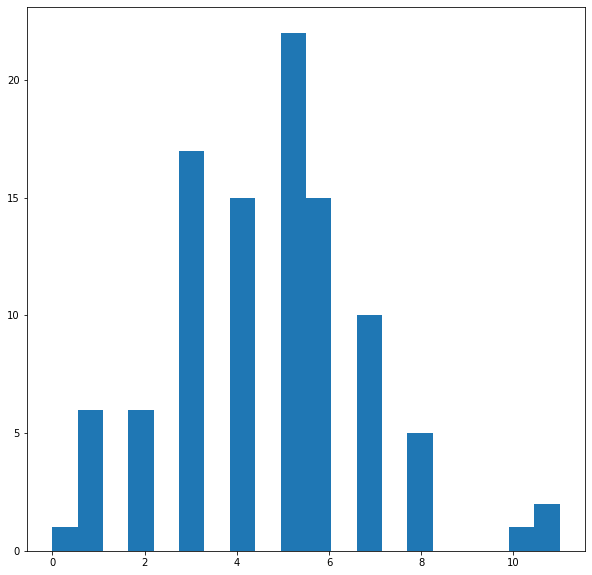

In [68]:
count, bins, ignored = plt.hist(s, 20)
plt.show() # plot histogram

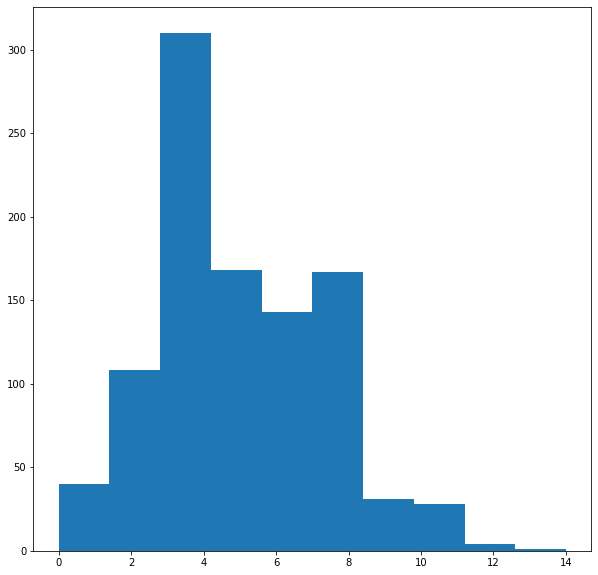

In [71]:
s = np.random.poisson(lam = 5, size = 1000) # draw samples
count, bins, ignored = plt.hist(s, 10)
plt.show() # plot histogram

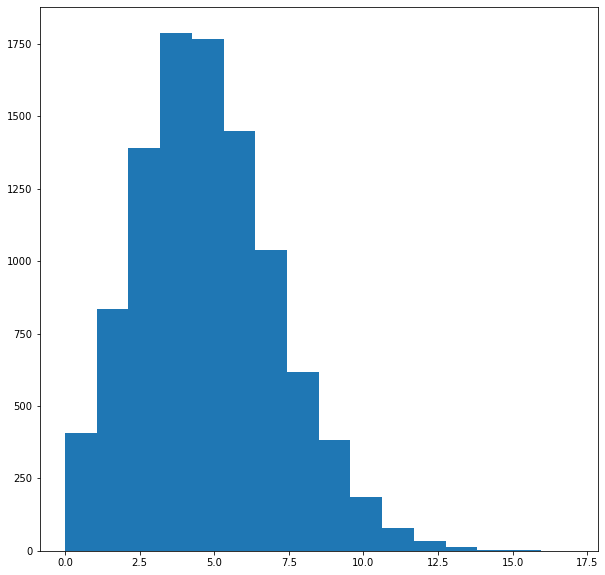

In [82]:
s = np.random.poisson(lam = 5, size = 10000) # draw samples
count, bins, ignored = plt.hist(s, 16)
plt.show() # plot histogram

The lambda value in the Poisson distribution corresponds to the mean. In each plot it is clear that the lambda value is roughly in the center of each distribution. As I increased the sample size the distribution appeared to become more symmetric. 

# What is the probability that the background produced a signal as signal-like or more than what I observed? 

In [63]:
val = 8
lam = 5

frozen_poisson = stats.poisson(lam)

In [64]:
probability = 1 -  frozen_poisson.cdf(val)
print('Probability of n = 8: ', probability)

sigma = frozen_poisson.ppf(probability)
print('Corresponding sigma: ', sigma)

Probability of n = 8:  0.06809363472184837
Corresponding sigma:  2.0


The mean of a Poisson distribution can be a non-integer value, but that does not mean the events are non-integer. The probabilities and sigmas are discrete because the events are independent of one another. The parameters of the distribution can be non-integer values because the events are measured across a continuous variable like space or time.